# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
emails = pd.read_csv('data/spam_or_not_spam.csv')

In [4]:
print(emails['label'].value_counts())

0    2500
1     500
Name: label, dtype: int64


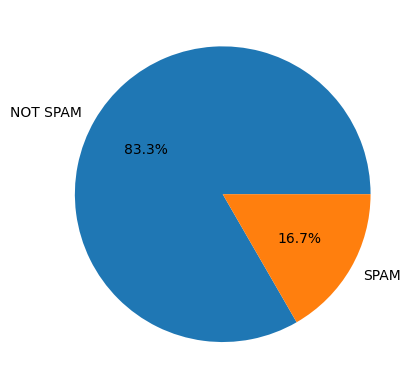

In [5]:
# визуализируйте результат: ваш код здесь

plt.pie(
    x=emails['label'].value_counts(), 
    labels=['NOT SPAM', 'SPAM'], 
    autopct='%1.1f%%'
    );

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [7]:
emails_clean = emails.copy()
emails_clean['email'] = emails_clean['email'].replace(' ', '')
emails_clean = emails_clean.dropna()

Переводим данные в векторный вид:

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails_clean["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [9]:
len(vectorizer.get_feature_names_out())

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [10]:
y = emails_clean['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    train_size=0.75, 
    stratify=y, 
    random_state=42
    )

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [12]:
round(y_test.mean(), 3)

0.167

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [13]:
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics 

clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

print(f'Accuracy for test:\n {round(metrics.accuracy_score(y_test, y_test_predict), 3)}')
print(f'Precision for test:\n {round(metrics.precision_score(y_test, y_test_predict), 3)}')

Accuracy for test:
 0.989
Precision for test:
 0.992


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [14]:
print(f'Recall for test:\n {round(metrics.recall_score(y_test, y_test_predict), 3)}')
print(f'F1 score for test:\n {round(metrics.f1_score(y_test, y_test_predict), 3)}')
print(f'MAE for test:\n {round(metrics.mean_absolute_error(y_test, y_test_predict), 3)}')

Recall for test:
 0.944
F1 score for test:
 0.967
MAE for test:
 0.011


Нарисуйте ROC-кривую:

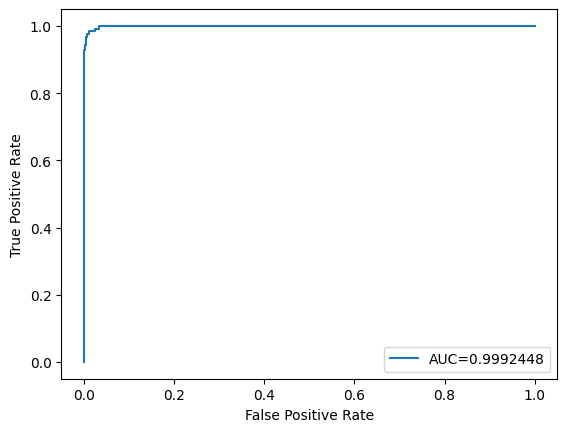

In [15]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [16]:
from sklearn.model_selection import GridSearchCV
import numpy as np

grid_params = {
    'alpha': list(np.linspace(0.001, 1, num=1000))
}       
            
grid_search = GridSearchCV(
    clf,
    param_grid=grid_params,
    cv=5,
    n_jobs=-1
)  
grid_search.fit(X_train, y_train) 

y_train_predict = grid_search.predict(X_train)
y_test_predict = grid_search.predict(X_test)

print("Best values of hyperparameters: {}".format(grid_search.best_params_))
print(f'Accuracy for test:\n {round(metrics.accuracy_score(y_test, y_test_predict), 3)}')
print(f'Precision for test:\n {round(metrics.precision_score(y_test, y_test_predict), 3)}')



Best values of hyperparameters: {'alpha': 0.04}
Accuracy for test:
 0.995
Precision for test:
 0.992
